In [47]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir = 'data'
os.listdir(data_dir)

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [42]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (180,180),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)

Found 1835 files belonging to 30 classes.
Using 1468 files for training.


In [43]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2, 
    subset="validation", 
    seed=123 
)

Found 1835 files belonging to 30 classes.
Using 367 files for validation.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(180,180),
    shuffle=False,
    batch_size=32,
)

In [37]:
category = data_train.class_names

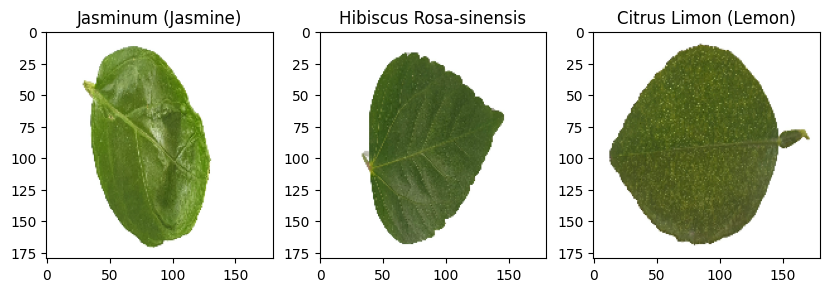

In [44]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range (3):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])

In [73]:
model = Sequential([
    Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
            input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=len(category), activation="softmax")
])


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 180, 180, 75)   │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 180, 180, 75)   │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 90, 90, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 90, 90, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 90, 90, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 90, 90, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 45, 45, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 45, 45, 25)     │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 45, 45, 25)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 13225)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     6,771,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,834,877 (26.07 MB)

 Trainable params: 6,834,577 (26.07 MB)

 Non-trainable params: 300 (1.17 KB)

In [63]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [66]:
history = model.fit(data_train, validation_data=data_val, epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5991 - loss: 1.8689 - val_accuracy: 0.1253 - val_loss: 13.7653
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7137 - loss: 1.0625 - val_accuracy: 0.4741 - val_loss: 2.7188
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8274 - loss: 0.6226 - val_accuracy: 0.3733 - val_loss: 3.4796
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8574 - loss: 0.5091 - val_accuracy: 0.6540 - val_loss: 1.4653
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8852 - loss: 0.5098 - val_accuracy: 0.7684 - val_loss: 0.9972
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8924 - loss: 0.3683 - val_accuracy: 0.7357 - val_loss: 1.1331
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9217 - loss: 0.2524 - val_accuracy: 0.2888 - val_loss: 9.1309
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9248 - loss: 0.2646 - val_accuracy: 0.7793 - val_loss